In [1]:
from framework import Framework

In [2]:
data_dir = "daily_cluster_data/daily_cluster_matrices_min_6"

fw = Framework(data_dir,verbose=1)
fw.run_experiment(2,30)

experimenting with:
 ['louvain']
creating matrices for sample_0
creating adjacency matrix with cooccurrence 0.02 seconds
creating adjacency matrix with jaccard 0.0 seconds
creating adjacency matrix with dice 0.0 seconds
creating adjacency matrix with cosine_nmf 1.46 seconds
creating adjacency matrix with cosine_svd 1.85 seconds
creating adjacency matrix with correlation 0.0 seconds
creating adjacency matrix with pmi 0.01 seconds
creating adjacency matrix with lift 0.01 seconds
creating adjacency matrix with tfidf 0.02 seconds
creating adjacency matrix with conditional 0.0 seconds
creating adjacency matrix with symmetric_conditional 0.01 seconds
creating adjacency matrix with sparse_cooccurrence 0.01 seconds
sample_0 cooccurrence louvain louvain_0
{0: 0, 1: 2, 2: 0, 3: 3, 4: 4, 5: 4, 6: 5, 7: 4, 8: 6, 9: 0, 10: 6, 11: 5, 12: 1, 13: 6, 14: 2, 15: 6, 16: 5, 17: 4, 18: 5, 19: 6, 20: 3, 21: 6, 22: 1, 23: 2, 24: 3, 25: 4, 26: 1, 27: 4, 28: 4, 29: 4, 30: 4, 31: 5, 32: 3, 33: 6, 34: 3, 35: 5, 

In [3]:
one_community_detection_run = fw.results['sample_0']['cooccurrence']['louvain']['louvain_0']['communities']

In [4]:
from itertools import combinations
import pandas as pd
from partition_metrics import all_metrics

# Get all unique community detection results
all_results = []
for sample_ID, modeling_methods in fw.results.items():
    for modeling_method, comm_methods in modeling_methods.items():
        for comm_method_name, hp_dict in comm_methods.items():
            for hp_ID, result in hp_dict.items():
                all_results.append({
                    'sample_ID': sample_ID,
                    'modeling_method': modeling_method,
                    'comm_method_name': comm_method_name,
                    'hp_ID': hp_ID,
                    'communities': result['communities']
                })

# Compare each pair of results
comparison_rows = []
for r1, r2 in combinations(all_results, 2):
    coms1 = list(r1['communities'].values())
    coms2 = list(r2['communities'].values())
    
    metrics = all_metrics(coms1, coms2, verbose=0)
    
    comparison_rows.append({
        'sample1': r1['sample_ID'],
        'sample2': r2['sample_ID'],
        'method1': f"{r1['modeling_method']}_{r1['comm_method_name']}_{r1['hp_ID']}",
        'method2': f"{r2['modeling_method']}_{r2['comm_method_name']}_{r2['hp_ID']}",
        'modeling_method1': r1['modeling_method'],
        'modeling_method2': r2['modeling_method'],
        'comm_method1': r1['comm_method_name'],
        'comm_method2': r2['comm_method_name'],
        'ari': metrics['ari'],
        'nmi': metrics['nmi'],
        'norm_edit_distance': metrics['norm_edit_distance']
    })

# Create DataFrame of comparisons
comparison_df = pd.DataFrame(comparison_rows)

# Add columns to identify different types of comparisons
comparison_df['different_samples'] = comparison_df['sample1'] != comparison_df['sample2']
comparison_df['different_modeling_methods'] = comparison_df['modeling_method1'] != comparison_df['modeling_method2']
comparison_df['different_comm_methods'] = comparison_df['comm_method1'] != comparison_df['comm_method2']

# Sort by different_samples and different_modeling_methods
comparison_df = comparison_df.sort_values(['different_samples', 'different_modeling_methods', 'different_comm_methods'], 
                                        ascending=[False, False, False])

print("\nComparison Results:")
print(comparison_df)



Comparison Results:
      sample1   sample2                                  method1  \
12   sample_0  sample_1           cooccurrence_louvain_louvain_0   
13   sample_0  sample_1           cooccurrence_louvain_louvain_0   
14   sample_0  sample_1           cooccurrence_louvain_louvain_0   
15   sample_0  sample_1           cooccurrence_louvain_louvain_0   
16   sample_0  sample_1           cooccurrence_louvain_louvain_0   
..        ...       ...                                      ...   
271  sample_1  sample_1                  tfidf_louvain_louvain_0   
272  sample_1  sample_1                  tfidf_louvain_louvain_0   
273  sample_1  sample_1            conditional_louvain_louvain_0   
274  sample_1  sample_1            conditional_louvain_louvain_0   
275  sample_1  sample_1  symmetric_conditional_louvain_louvain_0   

                                     method2       modeling_method1  \
12                 jaccard_louvain_louvain_0           cooccurrence   
13                  

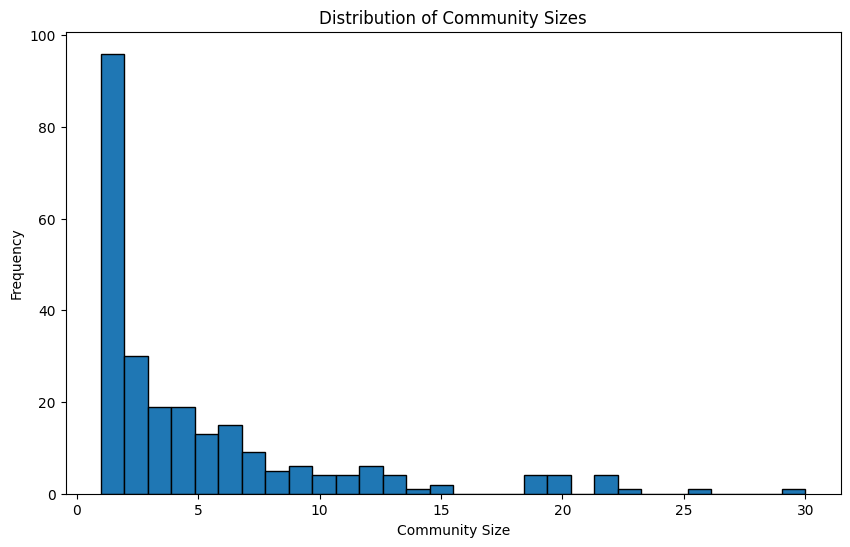

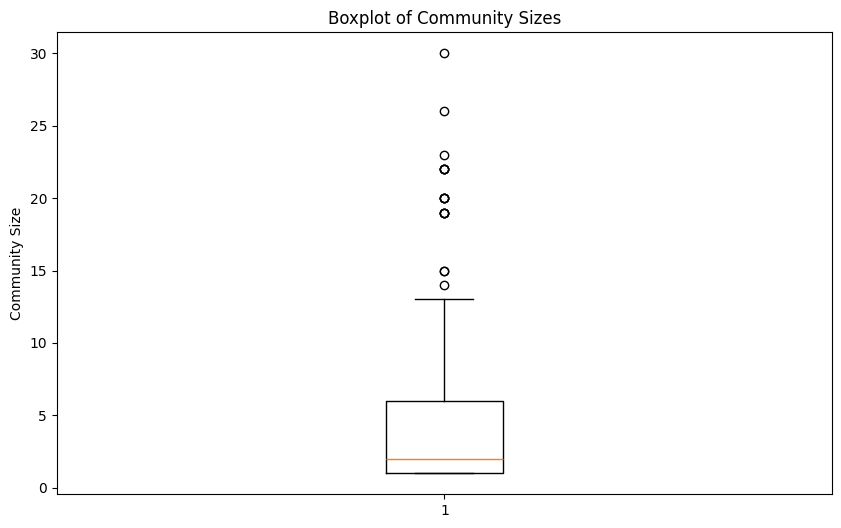

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Get all community assignments
all_communities = []
for sample_ID, modeling_methods in fw.results.items():
    for modeling_method, comm_methods in modeling_methods.items():
        for comm_method_name, hp_dict in comm_methods.items():
            for hp_ID, result in hp_dict.items():
                communities = result['communities']
                # Count size of each community
                community_sizes = pd.Series(list(communities.values())).value_counts()
                all_communities.extend(community_sizes.values)

# Create histogram of community sizes
plt.figure(figsize=(10, 6))
plt.hist(all_communities, bins=30, edgecolor='black')
plt.title('Distribution of Community Sizes')
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.show()

# Create boxplot of community sizes
plt.figure(figsize=(10, 6))
plt.boxplot(all_communities)
plt.title('Boxplot of Community Sizes')
plt.ylabel('Community Size')
plt.show()



In [5]:
comparison_df

,sample1,sample2,method1,method2,modeling_method1,modeling_method2,comm_method1,comm_method2,ari,nmi,norm_edit_distance,different_samples,different_modeling_methods,different_comm_methods
12,sample_0,sample_1,cooccurrence_louvain_louvain_0,jaccard_louvain_louvain_0,cooccurrence,jaccard,louvain,louvain,-0.043902,0.120644,0.244898,True,True,False
13,sample_0,sample_1,cooccurrence_louvain_louvain_0,dice_louvain_louvain_0,cooccurrence,dice,louvain,louvain,-0.043902,0.120644,0.244898,True,True,False
14,sample_0,sample_1,cooccurrence_louvain_louvain_0,cosine_nmf_louvain_louvain_0,cooccurrence,cosine_nmf,louvain,louvain,0.200538,0.558751,0.408163,True,True,False
15,sample_0,sample_1,cooccurrence_louvain_louvain_0,cosine_svd_louvain_louvain_0,cooccurrence,cosine_svd,louvain,louvain,0.209856,0.543965,0.448980,True,True,False
16,sample_0,sample_1,cooccurrence_louvain_louvain_0,correlation_louvain_louvain_0,cooccurrence,correlation,louvain,louvain,0.288434,0.493698,0.510204,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,sample_1,sample_1,tfidf_louvain_louvain_0,symmetric_conditional_louvain_louvain_0,tfidf,symmetric_conditional,louvain,louvain,-0.000265,0.164407,0.285714,False,True,False
272,sample_1,sample_1,tfidf_louvain_louvain_0,sparse_cooccurrence_louvain_louvain_0,tfidf,sparse_cooccurrence,louvain,louvain,-0.014605,0.065580,0.285714,False,True,False
273,sample_1,sample_1,conditional_louvain_louvain_0,symmetric_conditional_louvain_louvain_0,conditional,symmetric_conditional,louvain,louvain,0.236921,0.291856,0.551020,False,True,False
274,sample_1,sample_1,conditional_louvain_louvain_0,sparse_cooccurrence_louvain_louvain_0,conditional,sparse_cooccurrence,louvain,louvain,0.179549,0.214143,0.591837,False,True,False


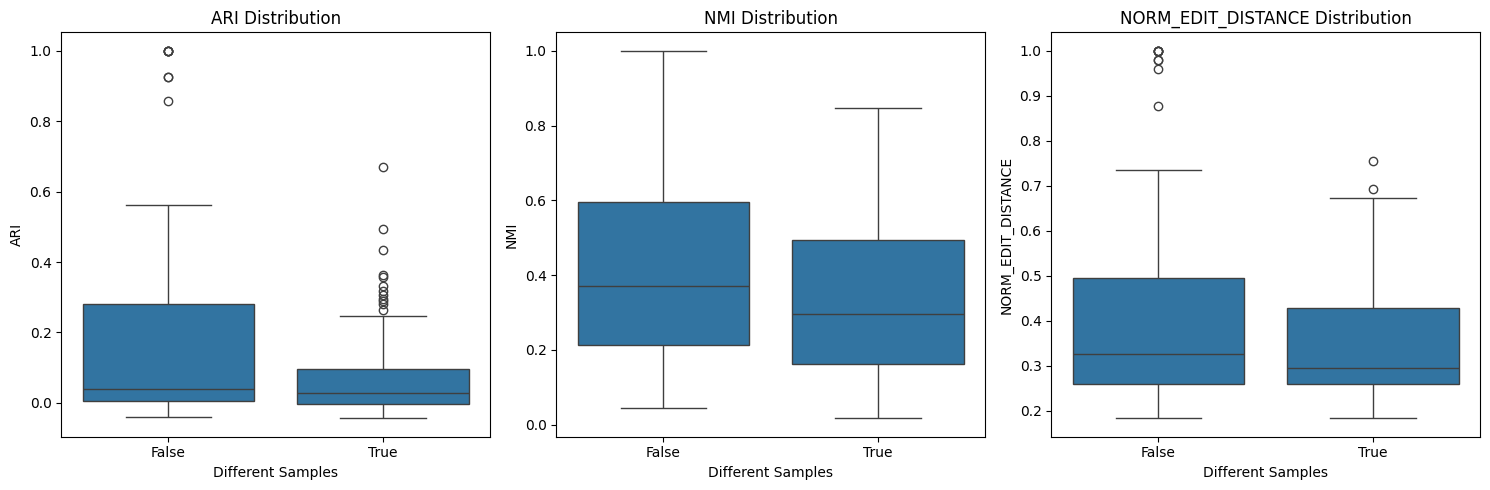

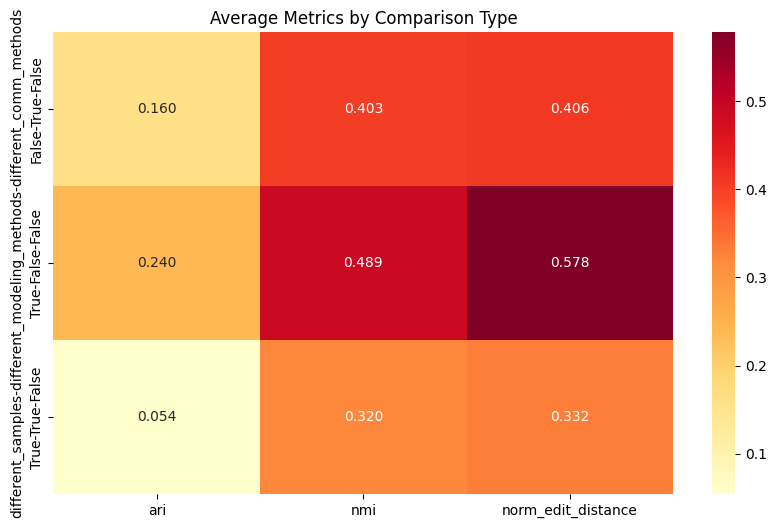

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['ari', 'nmi', 'norm_edit_distance']

for i, metric in enumerate(metrics):
    # Create boxplot
    sns.boxplot(data=comparison_df, 
                x='different_samples',
                y=metric,
                ax=axes[i])
    
    axes[i].set_title(f'{metric.upper()} Distribution')
    axes[i].set_xlabel('Different Samples')
    axes[i].set_ylabel(metric.upper())

plt.tight_layout()
plt.show()

# Create heatmap of average metrics for different comparison types
avg_metrics = comparison_df.groupby(['different_samples', 'different_modeling_methods', 'different_comm_methods'])[metrics].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(avg_metrics, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Average Metrics by Comparison Type')
plt.show()


In [7]:
import pandas as pd

rows = []
for sample_ID, modeling_methods in fw.results.items():
    for modeling_method, comm_methods in modeling_methods.items():
        for comm_method_name, hp_dict in comm_methods.items():
            for hp_ID, result in hp_dict.items():
                row = {
                    'sample_ID': sample_ID,
                    'modeling_method': modeling_method,
                    'comm_method_name': comm_method_name,
                    'hp_ID': hp_ID,
                    **result  # assuming result is a dict
                }
                rows.append(row)

df = pd.DataFrame(rows)
df

,sample_ID,modeling_method,comm_method_name,hp_ID,hyperparameters,communities
0,sample_0,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 1, 3: 2, 4: 0, 5: 0, 6: 5, 7: ..."
1,sample_1,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 2, 3: 2, 4: 0, 5: 0, 6: 3, 7: ..."
2,sample_2,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 2, 3: 2, 4: 0, 5: 0, 6: 3, 7: ..."
3,sample_3,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 2, 3: 3, 4: 0, 5: 0, 6: 4, 7: ..."
4,sample_4,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 2, 3: 1, 4: 0, 5: 0, 6: 3, 7: ..."
